In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os, sys
from dotenv import load_dotenv

In [2]:
rpath = os.path.abspath(r"C:\Users\HP\Desktop\week01_telecom")
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import dataLoder
telecom_df = dataLoder()

In [3]:
telecom_df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [5]:
telecom_df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [6]:
telecom_filterd = telecom_df.dropna(subset = ['MSISDN/Number', 'Bearer Id'])
telecom_filterd.isna().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                             160
Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
DL TP < 50 Kbps (%)                            712
50 Kbps < DL TP < 250 Kbps (%)                 712
250 Kbps < DL TP < 1 Mbps (%)                  712
DL TP > 1 Mbps (%)             

In [ ]:
######## I need to clac .count and .unique for telecom_filterd.groupby('MSISDN/Number')['Bearer Id'] 
# and compare between them to see the duplicated ['Bearer Id'] for each user 


In [10]:
telecom_filterd.groupby('MSISDN/Number')['Bearer Id'].nunique().to_frame('uniqueSessions').sort_values(by='uniqueSessions', ascending=False)

,uniqueSessions
MSISDN/Number,
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.367588e+10,15
...,...
3.366067e+10,1
3.366067e+10,1
3.366067e+10,1


In [11]:
telecom_filterd.groupby('MSISDN/Number')['Bearer Id'].count().to_frame('numberOfSessions').sort_values(by='numberOfSessions', ascending=False)

,numberOfSessions
MSISDN/Number,
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.376054e+10,15
...,...
3.366068e+10,1
3.366068e+10,1
3.366068e+10,1


In [17]:
no_of_sessions = (telecom_filterd.groupby('MSISDN/Number')['Bearer Id']
                  .value_counts()
                  .to_frame('numberOfSessions')
                  .sort_values(by='numberOfSessions', ascending=False))
no_of_sessions

numberOfSessions
MSISDN/Number Bearer Id                     
3.366553e+10  1.304243e+19                 9
3.366907e+10  1.304243e+19                 9
3.365836e+10  1.304243e+19                 9
3.366284e+10  1.311448e+19                 8
3.365982e+10  1.304243e+19                 8
...                                      ...
3.365950e+10  7.277826e+18                 1
              7.349883e+18                 1
              7.277826e+18                 1
              1.311448e+19                 1
8.823971e+14  7.277826e+18                 1

[147028 rows x 1 columns]

In [18]:
# no_of_sessions[no_of_sessions['MSISDN/Number'] == '3.366553e+10']
no_of_sessions.query('MSISDN/Number == 3.366553e+10')

UndefinedVariableError: name 'MSISDN' is not defined

KeyboardInterrupt: 

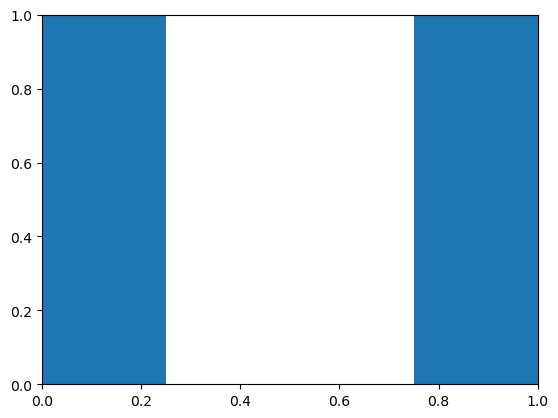

In [9]:
# Plot the total number of sessions per MSISDN
no_of_sessions.sum(axis=1).plot(kind='bar')

# Customize the plot (similar to stacked bar chart)
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Number of Sessions')
plt.title('Total Number of Sessions per MSISDN (Bar)')
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.show()


In [24]:
session_dur = (telecom_filterd.groupby('MSISDN/Number')['Dur. (ms)']
                  # .value_counts()
                  # .sort_values(by=['Dur. (ms)'], ascending=False)
                  )
                #   .to_frame('numberOfSessions')


In [25]:
session_dur

In [10]:
telecom_filterd[['MSISDN/Number', 'Dur. (ms)']].head(10)

,MSISDN/Number,Dur. (ms)
0,3.366496e+10,1823652.0
1,3.368185e+10,1365104.0
2,3.376063e+10,1361762.0
3,3.375034e+10,1321509.0
4,3.369980e+10,1089009.0
5,3.366819e+10,1074638.0
6,3.366537e+10,1035261.0
7,3.376349e+10,951292.0
8,3.369874e+10,941634.0
9,3.365922e+10,864482.0


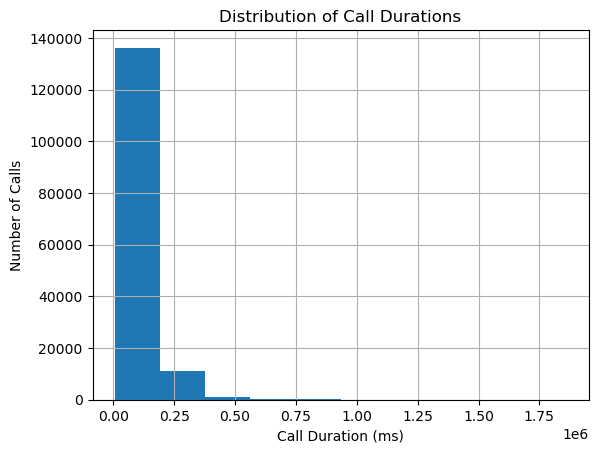

In [11]:
durations = telecom_filterd['Dur. (ms)']
plt.hist(durations)

# Customize the plot (optional)
plt.xlabel('Call Duration (ms)')
plt.ylabel('Number of Calls')
plt.title('Distribution of Call Durations')
plt.grid(True)  # Add grid lines for better readability

# Show the plot
plt.show()

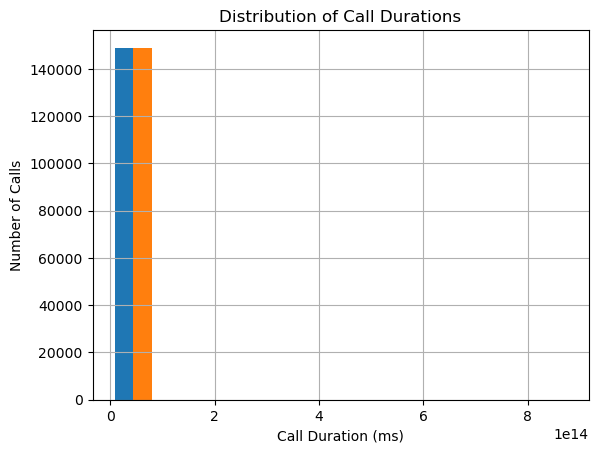

In [12]:
durations_per_number = telecom_filterd[['MSISDN/Number', 'Dur. (ms)']]
plt.hist(durations_per_number)

# Customize the plot (optional)
plt.xlabel('Call Duration (ms)')
plt.ylabel('Number of Calls')
plt.title('Distribution of Call Durations')
plt.grid(True)  # Add grid lines for better readability

# Show the plot
plt.show()

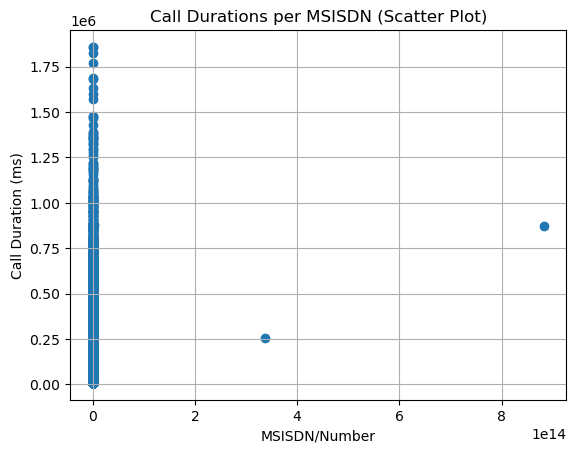

In [13]:
import matplotlib.pyplot as plt
import pandas as pd  # Assuming you have pandas imported for telecom_filterd

# Assuming telecom_filterd has 'MSISDN/Number' and 'Dur. (ms)' columns

# Extract data
msisdns = telecom_filterd['MSISDN/Number']
durations = telecom_filterd['Dur. (ms)']

# Create the scatter plot
plt.scatter(msisdns, durations)

# Customize the plot (optional)
plt.xlabel('MSISDN/Number')
plt.ylabel('Call Duration (ms)')
plt.title('Call Durations per MSISDN (Scatter Plot)')
plt.grid(True)  # Add grid lines for better readability

# Show the plot
plt.show()


In [14]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

KeyboardInterrupt: 

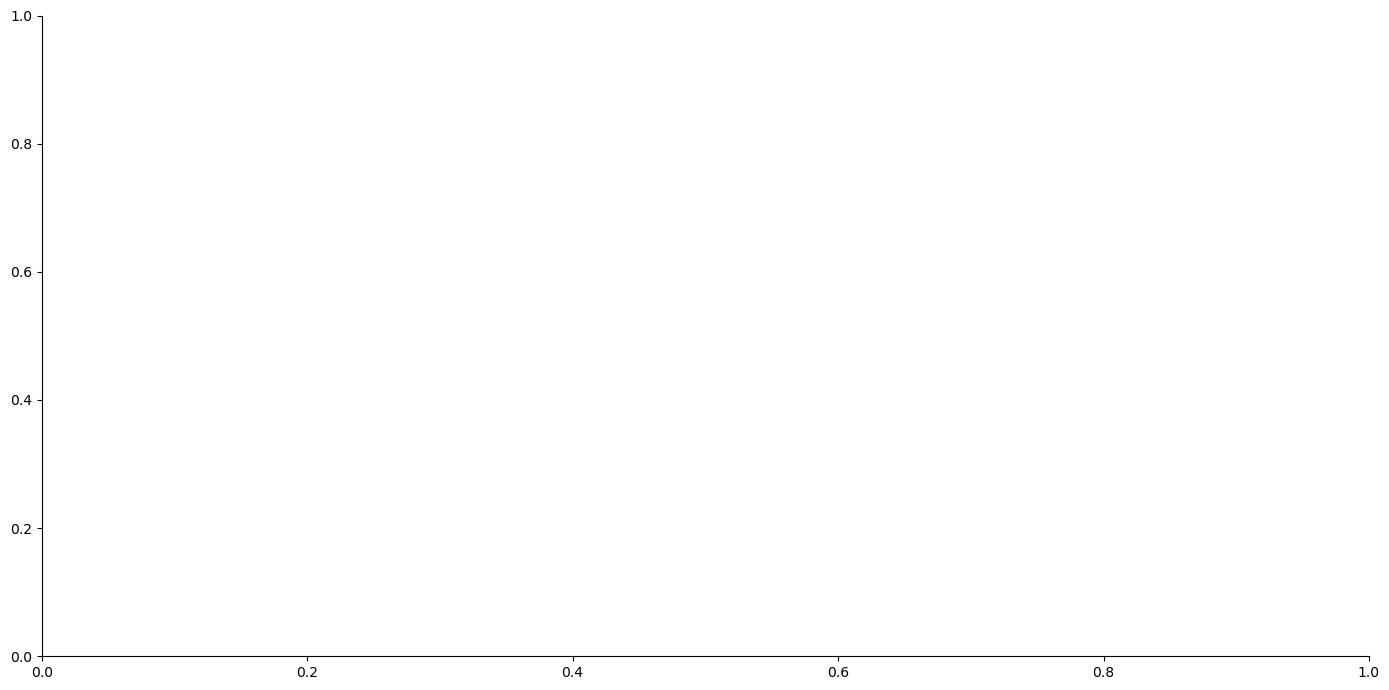

In [15]:
plot_hist(telecom_filterd, 'MSISDN/Number', 'Dur. (ms)')

In [5]:
telecom_df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [32]:
duplicating_check = telecom_df.duplicated(subset='Bearer Id').sum()
# if duplicating_check == True : 
    # print("T")
duplicating_check

15292

In [34]:
telecom_df['Bearer Id'].nunique()

134708

In [25]:
bearer_analysis = telecom_df.groupby('MSISDN/Number')
bearer_analysis['Bearer Id'].duplicated().sum()

AttributeError: 'SeriesGroupBy' object has no attribute 'duplicated'

In [19]:
import pandas as pd


# Select relevant columns
relevant_columns = ['MSISDN/Number', 'Bearer Id', 'Start', 'End', 'Dur. (ms)',
                    'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Social Media DL (Bytes)',
                    'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
                    'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
                    'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
                    'Other UL (Bytes)', 'Total DL (Bytes)','Total UL (Bytes)']
user_data = telecom_df[relevant_columns]

# Group by user (MSISDN) and calculate desired metrics
user_behavior = user_data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'nunique',  # Number of xDR sessions (unique Bearer Ids)
    'Dur. (ms)': 'sum',  # Total session duration
    **{app + ' DL (Bytes)': 'sum' for app in ['HTTP', 'Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']},  # Total download per application
    **{app + ' UL (Bytes)': 'sum' for app in ['HTTP', 'Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']},  # Total upload per application
    'Total DL (Bytes)': 'sum',  # Total download volume
    'Total UL (Bytes)': 'sum'   # Total upload volume

    # 'Total DL (Bytes)': lambda user_data: user_data.filter(like=' DL').sum(),  # Total download volume
    # 'Total UL (Bytes)': lambda user_data: user_data.filter(like=' UL').sum()   # Total upload volume
})

# Reset index to move 'MSISDN/Number' from row index to a column
user_behavior = user_behavior.reset_index()

print(user_behavior)


        MSISDN/Number  Bearer Id  Dur. (ms)  HTTP DL (Bytes)  \
0        3.360100e+10          1   116720.0              0.0   
1        3.360100e+10          1   181230.0              0.0   
2        3.360100e+10          1   134969.0              0.0   
3        3.360101e+10          1    49878.0           8749.0   
4        3.360101e+10          2    37104.0      185208098.0   
...               ...        ...        ...              ...   
106851   3.379000e+10          1     8810.0         642945.0   
106852   3.379000e+10          1   140988.0              0.0   
106853   3.197021e+12          1   877385.0              0.0   
106854   3.370000e+14          1   253030.0              0.0   
106855   8.823971e+14          1   869844.0              0.0   

        Social Media DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  \
0                     2206504.0          3337123.0          837400.0   
1                     2598548.0          4197697.0         2828821.0   
2              

In [20]:
pd.DataFrame(user_behavior).tail(20)

,MSISDN/Number,Bearer Id,Dur. (ms),HTTP DL (Bytes),Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),...,HTTP UL (Bytes),Social Media UL (Bytes),Google UL (Bytes),Email UL (Bytes),Youtube UL (Bytes),Netflix UL (Bytes),Gaming UL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
106836,3.378988e+10,1,159795.0,0.0,1526572.0,2638795.0,3183125.0,11853479.0,15490470.0,6.795634e+08,...,0.0,19566.0,3921693.0,830171.0,9529629.0,11892639.0,3399169.0,5128367.0,7.142558e+08,34721234.0
106837,3.378988e+10,1,175746.0,0.0,732065.0,3346908.0,1313311.0,17992503.0,2851750.0,2.493450e+07,...,0.0,24279.0,2510633.0,350089.0,15807513.0,9116407.0,1590238.0,11155179.0,5.117104e+07,40554338.0
106838,3.378988e+10,4,702234.0,2180655.0,7086852.0,27896243.0,8126457.0,35075895.0,45554753.0,1.589840e+09,...,160309.0,79679.0,9217481.0,623318.0,51892420.0,43274336.0,26394257.0,24100303.0,1.713581e+09,155581794.0
106839,3.378989e+10,1,135558.0,0.0,1893104.0,9405883.0,3505323.0,6841008.0,3981448.0,4.432691e+08,...,0.0,53422.0,2044174.0,554520.0,454915.0,20977833.0,3599468.0,9067857.0,4.688959e+08,36752189.0
106840,3.378989e+10,1,173035.0,0.0,221459.0,3601559.0,836987.0,18317934.0,16333875.0,7.579245e+08,...,0.0,5678.0,383698.0,169368.0,8891382.0,21899214.0,16471991.0,7881716.0,7.972363e+08,55703047.0
106841,3.378991e+10,1,44199.0,2709106.0,3489622.0,11076131.0,2988025.0,4706637.0,19410574.0,8.212614e+08,...,492006.0,9389.0,3501022.0,454772.0,3138196.0,11378309.0,8110342.0,12563994.0,8.629324e+08,39156024.0
106842,3.378991e+10,1,86399.0,545882.0,19911.0,7192559.0,271669.0,9443529.0,15019468.0,2.907074e+08,...,29872.0,50262.0,3697493.0,8892.0,16299116.0,3134278.0,15141121.0,5103478.0,3.226546e+08,43434640.0
106843,3.378991e+10,1,98294.0,0.0,916321.0,10140885.0,2907839.0,4976805.0,20923570.0,4.428094e+08,...,0.0,58329.0,40439.0,17627.0,12921556.0,9049030.0,15547827.0,13757241.0,4.826749e+08,51392049.0
106844,3.378992e+10,1,54339.0,19414936.0,2362158.0,8926384.0,329964.0,4765077.0,6782568.0,5.199209e+08,...,738403.0,42044.0,2976470.0,277638.0,2782265.0,21772029.0,2579929.0,3306934.0,5.430871e+08,33737309.0
106845,3.378994e+10,1,36812.0,141333369.0,1405120.0,102513.0,821911.0,20373367.0,8788458.0,1.182722e+08,...,2557570.0,32287.0,2530052.0,853341.0,21986509.0,7794549.0,9861261.0,1095661.0,1.497636e+08,44153660.0


In [14]:
import cProfile

# Run the function with profiling
cProfile.run('user_behavior')


         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [36]:
import pandas as pd

# Assuming your DataFrame is called 'telecom_df'

user = telecom_df[['MSISDN/Number', 'Bearer Id']]  # Select relevant columns

# Group by user and count sessions
user_sessions = user.groupby('MSISDN/Number')['Bearer Id'].size()

# Identify groups with more than one session (potential duplicates)
multiple_bearers = user_sessions[user_sessions > 1].index.tolist()

# Check if there are users with duplicate Bearer Ids
if multiple_bearers:
  print("There are users sharing the same Bearer Id:")
  print(multiple_bearers)
else:
  print("No users found sharing the same Bearer Id.")


There are users sharing the same Bearer Id:
[33601008617.0, 33601010682.0, 33601011634.0, 33601014694.0, 33601034530.0, 33601034784.0, 33601048751.0, 33601054608.0, 33601055260.0, 33601055375.0, 33601063991.0, 33601072619.0, 33601073097.0, 33601073415.0, 33601082181.0, 33601086000.0, 33601088633.0, 33601101581.0, 33601121585.0, 33601142645.0, 33601145915.0, 33601152662.0, 33601160415.0, 33601180416.0, 33601182120.0, 33601184331.0, 33601192287.0, 33601205909.0, 33601212056.0, 33601224236.0, 33601231383.0, 33601233494.0, 33601247220.0, 33601250979.0, 33601252842.0, 33601262575.0, 33601263919.0, 33601265927.0, 33601270243.0, 33601270437.0, 33601270534.0, 33601271397.0, 33601273162.0, 33601278242.0, 33601280078.0, 33601291883.0, 33601291927.0, 33601293747.0, 33601298492.0, 33601304615.0, 33601312811.0, 33601330095.0, 33601330951.0, 33601337151.0, 33601343095.0, 33601351171.0, 33601353061.0, 33601363518.0, 33601371877.0, 33601382126.0, 33601387862.0, 33601388519.0, 33601426355.0, 3360143557

In [35]:
user = telecom_df[['MSISDN/Number', 'Bearer Id']]  # Select relevant columns

# Group by user and count sessions
user_sessions = user.groupby('MSISDN/Number')['Bearer Id'].size()
user_sessions


MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: Bearer Id, Length: 106856, dtype: int64

In [46]:
telecom_df['MSISDN/Number'].isna().sum()

1066

In [44]:
user_data.describe().map('{:,}'.format)

,MSISDN/Number,Bearer Id,Dur. (ms),HTTP DL (Bytes),HTTP UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
count,"148,935.0","149,010.0","150,000.0","68,527.0","68,191.0","150,001.0","150,001.0","150,001.0","150,001.0","150,001.0",...,"150,001.0","150,001.0","150,001.0","150,001.0","150,001.0","150,001.0","150,001.0","150,001.0","150,000.0","150,000.0"
mean,"41,882,819,545.02736",1.013887465425634e+19,"104,608.56034666667","114,471,023.70188393","3,242,301.384874837","1,795,321.7736466667","32,928.43438","5,750,752.619286667","2,056,541.9262866667","1,791,728.86802",...,"11,634,072.5039","11,009,410.1347","11,626,851.71874","11,001,754.81964","422,044,702.59537333","8,288,398.110733334","421,100,544.19449335","8,264,799.4244266655","454,643,430.0789667","41,121,206.292106666"
std,"2,447,443,358,621.665",2.893172512268411e+18,"81,037.62147900184","963,194,563.9774487","19,570,643.166646227","1,035,482.2759530023","19,006.17825621309","3,309,097.0173686827","1,189,916.9260041018","1,035,839.5103368211",...,"6,710,568.850189704","6,345,423.354475547","6,725,218.026493558","6,359,489.759474565","243,967,494.34637824","4,782,699.656231569","243,205,009.80815506","4,769,003.686403115","244,142,874.37628365","11,276,386.51468903"
min,"33,601,001,722.0",6.91753751854353e+18,"7,142.0",40.0,40.0,12.0,0.0,207.0,3.0,14.0,...,53.0,105.0,42.0,35.0,"2,516.0",59.0,"3,290.0",148.0,"7,114,041.0","2,866,892.0"
25%,"33,651,295,581.5",7.34988324695399e+18,"57,440.5","112,403.5","24,322.0","899,148.0","16,448.0","2,882,393.0","1,024,279.0","892,793.0",...,"5,833,501.0","5,517,965.0","5,777,156.0","5,475,981.0","210,473,253.0","4,128,476.0","210,186,872.0","4,145,943.0","243,106,803.0","33,222,010.5"
50%,"33,663,706,799.0",7.349883264156585e+18,"86,399.0","1,941,949.0","229,733.0","1,794,369.0","32,920.0","5,765,829.0","2,054,573.0","1,793,505.0",...,"11,616,019.0","11,013,447.0","11,642,217.0","10,996,384.0","423,408,104.0","8,291,208.0","421,803,006.0","8,267,071.0","455,841,077.5","41,143,312.0"
75%,"33,683,490,769.0",1.3042425978957576e+19,"132,430.25","25,042,903.5","1,542,827.0","2,694,938.0","49,334.0","8,623,552.0","3,088,454.0","2,689,327.0",...,"17,448,518.0","16,515,562.0","17,470,478.0","16,507,268.0","633,174,167.0","12,431,624.0","631,691,786.0","12,384,148.0","665,705,544.0","49,034,238.5"
max,"882,397,108,489,451.0",1.31865411671342e+19,"1,859,336.0","72,530,636,168.0","1,491,889,672.0","3,586,064.0","65,870.0","11,462,832.0","4,121,357.0","3,586,146.0",...,"23,259,098.0","22,011,962.0","23,259,189.0","22,011,955.0","843,441,889.0","16,558,794.0","843,442,489.0","16,558,816.0","902,969,616.0","78,331,311.0"


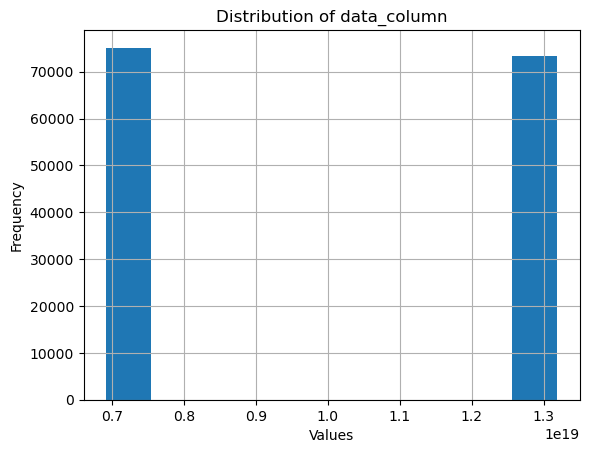

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_column' is the column you want to check
data_column = telecom_filterd['Bearer Id']
data_column.hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of data_column')
plt.show()


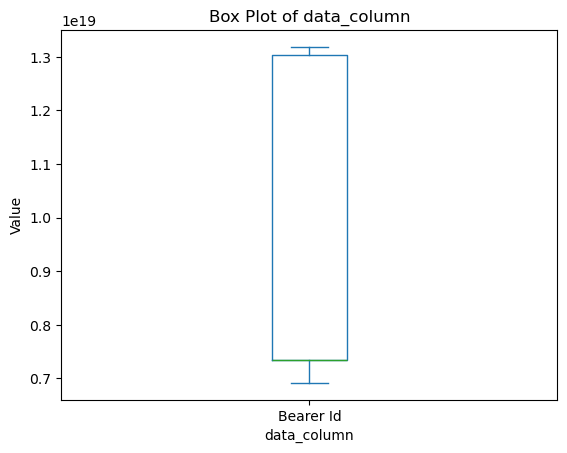

In [22]:
telecom_filterd['Bearer Id'].plot(kind='box')
plt.xlabel('data_column')
plt.ylabel('Value')
plt.title('Box Plot of data_column')
plt.show()


In [23]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

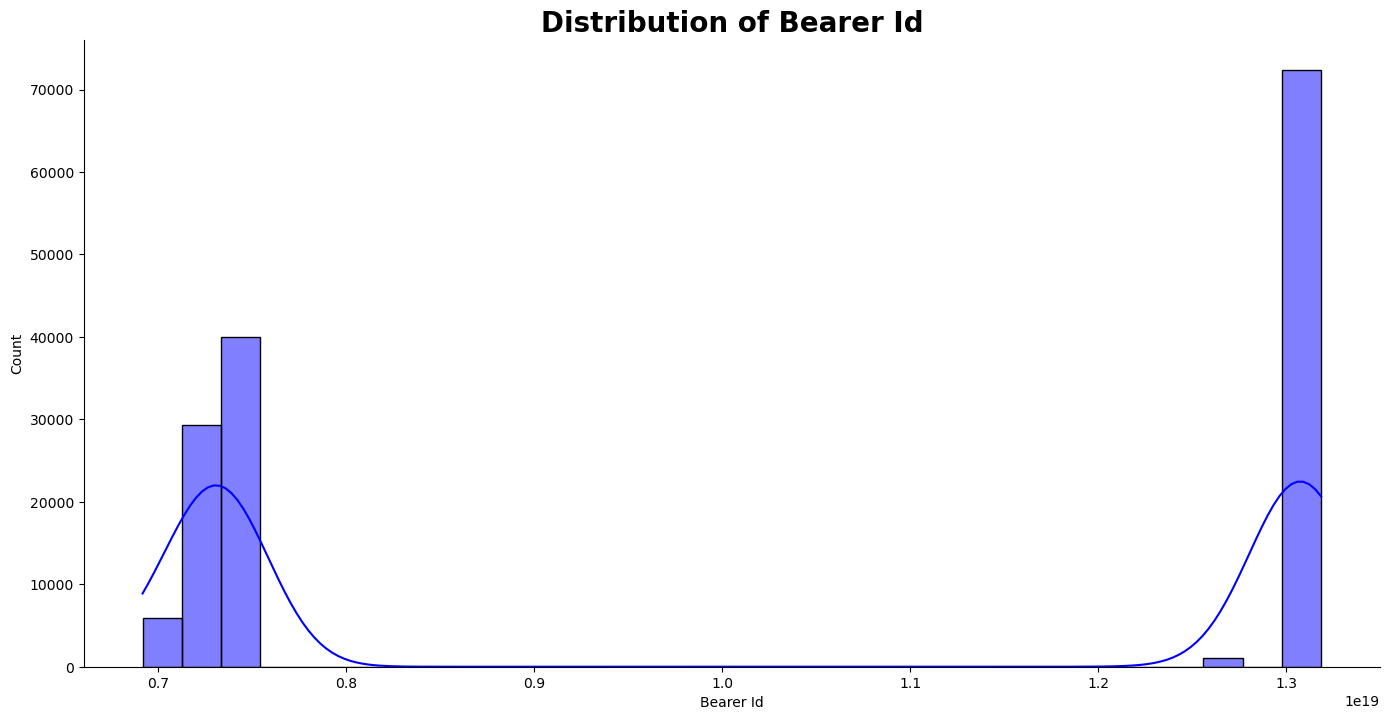

In [25]:
plot_hist(telecom_filterd, 'Bearer Id', "blue")

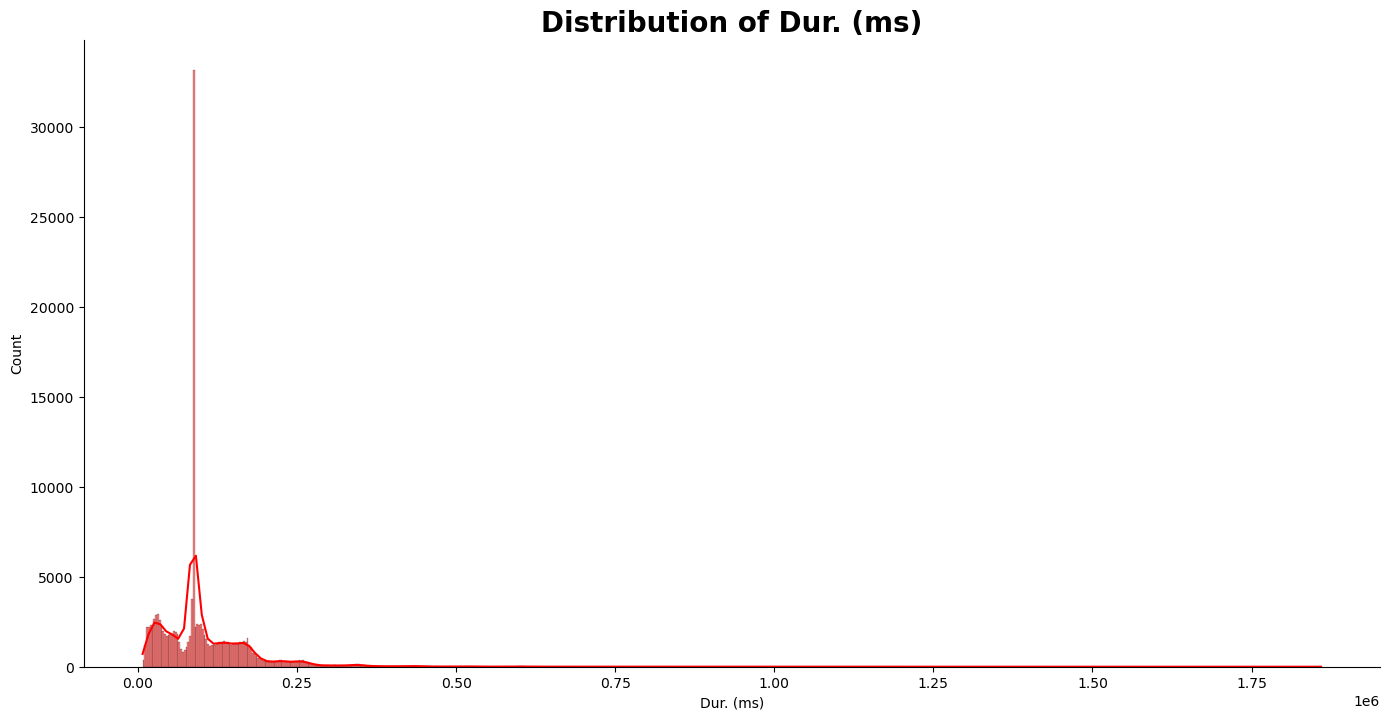

In [26]:
plot_hist(telecom_filterd, 'Dur. (ms)', 'red')

In [32]:
def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(15, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

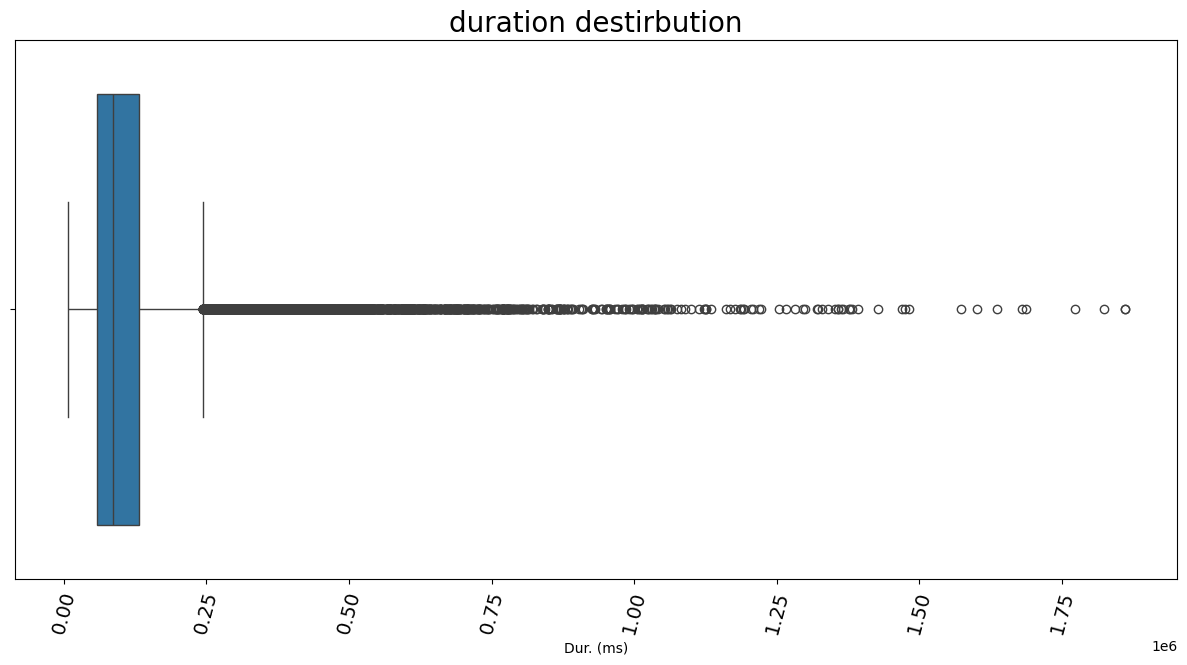

In [33]:
plot_box(telecom_filterd, 'Dur. (ms)', 'duration destirbution')